---

### 🎓 **Professor**: Apostolos Filippas

### 📘 **Class**: AI Engineering

### 📋 **Homework 4**: Embeddings & Semantic Search

### 📅 **Due Date**: Day of Lecture 5, 11:59 PM


**Note**: You are not allowed to share the contents of this notebook with anyone outside this class without written permission by the professor.

---

In this homework, you'll build on Homework 3 (BM25 search) by adding **embedding-based semantic search**.

You will:
1. **Generate embeddings** using both local (Hugging Face) and API (OpenAI) models
2. **Implement cosine similarity** from scratch
3. **Implement semantic search** from scratch
4. **Compare BM25 vs semantic search** using Recall
5. **Compare different embedding models** and analyze their differences

**Total Points: 95**

---

## Instructions

- Complete all tasks by filling in code where you see `# YOUR CODE HERE`
- You may use ChatGPT, Claude, documentation, Stack Overflow, etc.
- When using external resources, briefly cite them in a comment
- Run all cells before submitting to ensure they work

**Submission:**
1. Create a branch called `homework-4`
2. Commit and push your work
3. Create a PR and merge to main
4. Submit the `.ipynb` file on Blackboard

---

## Task 1: Environment Setup (10 points)

### 1a. Imports (5 pts)

Import the required libraries and load the WANDS data.

In [1]:
import sys, os

sys.path.append(os.path.join(os.getcwd(), "scripts"))

from helpers import load_wands_products, load_wands_queries, load_wands_labels


In [2]:
import os, sys

print("CWD:", os.getcwd())
print("Root files:", os.listdir("."))
print("scripts exists:", os.path.isdir("scripts"))
if os.path.isdir("scripts"):
    print("scripts contents:", os.listdir("scripts"))
    

CWD: c:\Users\DELL\ai-engineering-fordham
Root files: ['.env', '.git', '.gitignore', '.python-version', '.venv', 'data', 'helpers.py', 'homework-1.ipynb', 'homework-2.ipynb', 'homework-3.ipynb', 'homework-4.ipynb', 'main.py', 'pyproject.toml', 'README.md', 'temp', 'uv.lock', 'wayfair-labels.csv.csv', 'wayfair-products.csv.csv', 'wayfair-queries.csv.csv', '__pycache__']
scripts exists: False


In [3]:
import sys
print(sys.executable)


C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe


In [4]:
import sys
!"{sys.executable}" -m pip install sentence-transformers litellm python-dotenv


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import sentence_transformers, litellm
from dotenv import load_dotenv
print("imports ok")


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


imports ok


In [6]:
# ruff: noqa: E402

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

# Import ONLY data loading from helpers
import sys
sys.path.append('../scripts')
from helpers import load_wands_products, load_wands_queries, load_wands_labels

# Embedding libraries - we use these directly
from sentence_transformers import SentenceTransformer
import litellm

# Load environment variables for API keys
from dotenv import load_dotenv
load_dotenv()

pd.set_option('display.max_colwidth', 80)
print("All imports successful!")

All imports successful!


In [11]:
import os
print(os.getcwd())


c:\Users\DELL\ai-engineering-fordham


In [15]:
import os
print(os.getcwd())


c:\Users\DELL\ai-engineering-fordham


In [1]:
import os

print("Current working dir:")
print(os.getcwd())

print("\nFiles here:")
print(os.listdir())

print("\nParent files:")
print(os.listdir(".."))


Current working dir:
c:\Users\DELL\ai-engineering-fordham

Files here:
['.env', '.git', '.gitignore', '.python-version', '.venv', 'data', 'helpers.py', 'homework-1.ipynb', 'homework-2.ipynb', 'homework-3.ipynb', 'homework-4.ipynb', 'main.py', 'pyproject.toml', 'README.md', 'temp', 'uv.lock', 'wayfair-labels.csv', 'wayfair-products.csv', 'wayfair-queries.csv', '__pycache__']

Parent files:
['.cursor', '.git', '.gitconfig', '.gitignore', '.ipython', '.jupyter', '.lesshst', '.local', '.matplotlib', '.python-version', '.venv', '.viminfo', 'ai-engineering-fordham', 'AppData', 'Application Data', 'ce', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'Links', 'Local Settings', 'main.py', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{27c5b0f5-a14a-11f0-b6b9-f4289d792ffe}.TM.blf', 'NTUSER.DAT{27c5b0f5-a14a-11f0-b6b9-f4289d792ffe}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{27c5b0f5-a14a-11f0-b6b9-f4289d792ffe}.TMC

In [2]:
from helpers import *
import os


In [3]:
print("Current folder:", os.getcwd())
print("Data folder files:", os.listdir("data"))


Current folder: c:\Users\DELL\ai-engineering-fordham
Data folder files: ['label.csv', 'product.csv', 'query.csv', 'wayfair-labels.csv', 'wayfair-products.csv', 'wayfair-queries.csv']


In [5]:
import os

print("CWD:", os.getcwd())
print("Root files:", os.listdir())
print("Data exists?:", os.path.exists("data"))


CWD: c:\Users\DELL\ai-engineering-fordham
Root files: ['.env', '.git', '.gitignore', '.python-version', '.venv', 'data', 'helpers.py', 'homework-1.ipynb', 'homework-2.ipynb', 'homework-3.ipynb', 'homework-4.ipynb', 'main.py', 'pyproject.toml', 'README.md', 'temp', 'uv.lock', 'wayfair-labels.csv', 'wayfair-products.csv', 'wayfair-queries.csv', '__pycache__']
Data exists?: True


In [6]:
import os

print("ROOT:", os.listdir())
print("DATA:", os.listdir("data"))



ROOT: ['.env', '.git', '.gitignore', '.python-version', '.venv', 'data', 'helpers.py', 'homework-1.ipynb', 'homework-2.ipynb', 'homework-3.ipynb', 'homework-4.ipynb', 'main.py', 'pyproject.toml', 'README.md', 'temp', 'uv.lock', 'wayfair-labels.csv', 'wayfair-products.csv', 'wayfair-queries.csv', '__pycache__']
DATA: ['label.csv', 'product.csv', 'query.csv', 'wayfair-labels.csv', 'wayfair-products.csv', 'wayfair-queries.csv']


In [8]:
import pandas as pd

products = pd.read_csv("data/wayfair-products.csv", sep="\t")
queries  = pd.read_csv("data/wayfair-queries.csv", sep="\t")
labels   = pd.read_csv("data/wayfair-labels.csv", sep="\t")



In [10]:
import pandas as pd

products = pd.read_csv("data/wayfair-products.csv", sep="\t")
queries  = pd.read_csv("data/wayfair-queries.csv", sep="\t")
labels   = pd.read_csv("data/wayfair-labels.csv", sep="\t")

print(len(products), len(queries), len(labels))


42994 480 233448


### 1b. Copy BM25 functions from HW3 (5 pts)

Copy your BM25 implementation from Homework 3. We'll use it to compare against semantic search.

In [12]:
# Copy your BM25 functions from Homework 3
# Note: We'll use the ones from helpers.py instead

from helpers import snowball_tokenize, build_index, score_bm25, search_bm25

print("✅ BM25 functions imported from helpers.py")
print("Available functions: snowball_tokenize, build_index, score_bm25, search_bm25")


✅ BM25 functions imported from helpers.py
Available functions: snowball_tokenize, build_index, score_bm25, search_bm25


---

## Task 2: Understanding Embeddings (15 points)

### 2a. Load a local model and generate embeddings (5 pts)

Use `sentence-transformers` to load a local embedding model and generate embeddings for a list of words.

In [14]:
# Load embedding model
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

# List of words to embed
words = [
    "wooden coffee table",
    "oak dining table",
    "red leather sofa",
    "blue area rug",
    "kitchen sink"
]

# Generate embeddings
word_embeddings = model.encode(words)

# Print results
print("Number of embeddings:", len(word_embeddings))
print("Dimension of each embedding:", word_embeddings.shape[1])


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 103/103 [00:00<00:00, 374.77it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Number of embeddings: 5
Dimension of each embedding: 384


### 2b. Implement cosine similarity and create a similarity matrix (5 pts)

Implement cosine similarity from scratch:

$$\text{cosine\_similarity}(a, b) = \frac{a \cdot b}{\|a\| \times \|b\|}$$

In [15]:
def cosine_similarity(a, b):
    # YOUR CODE HERE
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

# Create similarity matrix for the words above
num_words = len(words)
sim_matrix = np.zeros((num_words, num_words))

for i in range(num_words):
    for j in range(num_words):
        sim_matrix[i, j] = cosine_similarity(word_embeddings[i], word_embeddings[j])

# Display as DataFrame
sim_df = pd.DataFrame(sim_matrix, index=words, columns=words)
display(sim_df)
# Implement cosine similarity from scratch

# Create similarity matrix

# Display as DataFrame


,wooden coffee table,oak dining table,red leather sofa,blue area rug,kitchen sink
wooden coffee table,1.000000,0.588631,0.370622,0.189486,0.295712
oak dining table,0.588631,1.000000,0.337910,0.249521,0.341410
red leather sofa,0.370622,0.337910,1.000000,0.380310,0.057740
blue area rug,0.189486,0.249521,0.380310,1.000000,0.125802
kitchen sink,0.295712,0.341410,0.057740,0.125802,1.000000


### 2c. Embed using OpenAI API (5 pts)

Use `litellm` to get embeddings from OpenAI's API and compare dimensions.

In [18]:
import numpy as np
import litellm
from dotenv import load_dotenv

load_dotenv()


True

In [19]:
# Use litellm to get an embedding from OpenAI's text-embedding-3-small model
# Compare the dimension with the local model
response = litellm.embedding(model="text-embedding-3-small", input=["wooden coffee table"])
openai_emb = np.array(response.data[0]["embedding"])

print(f"OpenAI dimension: {len(openai_emb)}")
print(f"Local model dimension: {word_embeddings.shape[1]}")

OpenAI dimension: 1536
Local model dimension: 384


---

## Task 3: Batch Embedding Products (20 points)

### 3a. Embed a product sample (10 pts)

Create a combined text field and embed 5,000 products using the local model.

In [20]:
# Get a consistent sample
products_sample = products.sample(n=5000, random_state=42).reset_index(drop=True)

In [21]:
# Create a combined text field (product_name + product_class)
products_sample['embed_text'] = (
    products_sample['product_name'].fillna('') + ' ' + 
    products_sample['product_class'].fillna('')
)

# Embed all products using the local model (model.encode)
# This may take a minute or two depending on your machine
print("Embedding 5,000 products...")
product_embeddings = model.encode(products_sample['embed_text'].tolist(), show_progress_bar=True)

print(f"Embeddings generated. Shape: {product_embeddings.shape}")


Embedding 5,000 products...


Batches: 100%|██████████| 157/157 [00:24<00:00,  6.33it/s]


Embeddings generated. Shape: (5000, 384)


### 3b. Save and load embeddings (5 pts)

Save embeddings to a `.npy` file so you don't have to recompute them.

In [22]:
import os

# Create temp directory if it doesn't exist
os.makedirs('../temp', exist_ok=True)

# Save embeddings and the product sample
np.save('../temp/hw4_embeddings.npy', product_embeddings)
products_sample.to_csv('../temp/hw4_products.csv', index=False)

# Load them back to verify
loaded_embeddings = np.load('../temp/hw4_embeddings.npy')
loaded_products = pd.read_csv('../temp/hw4_products.csv')

# Verify the shapes match
print(f"Original shape: {product_embeddings.shape}")
print(f"Loaded shape:   {loaded_embeddings.shape}")

Original shape: (5000, 384)
Loaded shape:   (5000, 384)


### 3c. Cost estimation (5 pts)

Estimate the cost to embed all 43K products using OpenAI's API.

**Pricing**: text-embedding-3-small costs ~$0.02 per 1 million tokens.

In [23]:
import os

# Create temp directory if it doesn't exist
os.makedirs('../temp', exist_ok=True)

# Save embeddings and the product sample
np.save('../temp/hw4_embeddings.npy', product_embeddings)
products_sample.to_csv('../temp/hw4_products.csv', index=False)

# Load them back to verify
loaded_embeddings = np.load('../temp/hw4_embeddings.npy')
loaded_products = pd.read_csv('../temp/hw4_products.csv')

# Verify the shapes match
print(f"Original shape: {product_embeddings.shape}")
print(f"Loaded shape:   {loaded_embeddings.shape}")

Original shape: (5000, 384)
Loaded shape:   (5000, 384)


---

## Task 4: Semantic Search (25 points)

### 4a. Implement semantic search (15 pts)

Implement a semantic search function from scratch.

In [24]:
# Implement batch cosine similarity for efficiency
def batch_cosine_similarity(query_emb, document_embeddings):
    """
    Calculates cosine similarity between a single query vector and a matrix of document vectors.
    """
    # Ensure query is a 2D array for matrix multiplication
    if query_emb.ndim == 1:
        query_emb = query_emb.reshape(1, -1)
        
    # Dot product: (1 x dim) * (dim x num_docs) -> (1 x num_docs)
    dot_product = np.dot(query_emb, document_embeddings.T)
    
    # Calculate norms for normalization
    query_norm = np.linalg.norm(query_emb, axis=1, keepdims=True)
    doc_norms = np.linalg.norm(document_embeddings, axis=1, keepdims=True)
    
    # Cosine similarity formula: dot(a, b) / (||a|| * ||b||)
    similarity = dot_product / (query_norm * doc_norms.T)
    
    return similarity.flatten()

In [25]:
# Implement semantic search
def semantic_search(query, model, product_embeddings, products_df, k=10):
    # 1. Generate embedding for the search query
    query_emb = model.encode(query, convert_to_numpy=True)
    
    # 2. Calculate similarity scores against all products
    similarities = batch_cosine_similarity(query_emb, product_embeddings)
    
    # 3. Get indices of the top-k highest scores
    top_k_idx = np.argsort(-similarities)[:k]
    
    # 4. Return the corresponding products and their scores
    results = products_df.iloc[top_k_idx].copy()
    results['similarity'] = similarities[top_k_idx]
    results['rank'] = range(1, k + 1)
    
    return results


In [26]:
# Test semantic search
test_results = semantic_search("comfortable modular sofa", model, product_embeddings, products_sample, k=5)
display(test_results[['rank', 'product_name', 'product_class', 'similarity']])

,rank,product_name,product_class,similarity
4683,1,106.5 '' wide symmetrical modular sofa & chaise,Sectionals,0.764928
2120,2,kendall sectional sofa with ottoman,Sectionals,0.759946
3226,3,aireka 103.5 '' wide reversible modular sofa &...,Sectionals,0.752010
794,4,akiko 104 '' wide velvet reversible modular so...,Sectionals,0.751293
2695,5,aelber 170 '' wide reversible modular sofa & c...,Sectionals,0.743226


### 4b. Evaluate and compare BM25 vs semantic search (10 pts)

Implement Recall@k and compare the two search methods.

In [27]:
# Implement Recall@k
def calculate_recall_at_k(results_df, query_id, labels_df, k=10):
    # Get the list of product IDs marked as relevant for this query in the ground truth
    relevant_ids = set(labels_df[labels_df['query_id'] == query_id]['product_id'])
    
    if not relevant_ids:
        return 0.0
    
    # Get the IDs of the top k products returned by our search
    top_k_ids = set(results_df['product_id'].head(k))
    
    # Calculate intersection (hits)
    hits = len(relevant_ids.intersection(top_k_ids))
    
    return hits / len(relevant_ids)

In [28]:
# Build BM25 index for comparison
from helpers import build_index, search_bm25
sample_index, sample_lengths = build_index(products_sample['product_name'].tolist())
# Filter queries to those with products in our sample
sample_product_ids = set(products_sample['product_id'])
relevant_labels = labels[labels['product_id'].isin(sample_product_ids)]
sample_query_ids = set(relevant_labels['query_id'])
test_queries = queries[queries['query_id'].isin(sample_query_ids)]

print(f"Evaluating on {len(test_queries)} applicable queries...")

Evaluating on 473 applicable queries...


In [29]:
# Evaluate both BM25 and semantic search on all queries
# Calculate Recall@10 for each method
bm25_recalls = []
semantic_recalls = []

for _, row in test_queries.iterrows():
    qid, qtext = row['query_id'], row['query']
    
    # BM25 Search
    res_bm25 = search_bm25(qtext, sample_index, products_sample, sample_lengths, k=10)
    bm25_recalls.append(calculate_recall_at_k(res_bm25, qid, relevant_labels, k=10))
    
    # Semantic Search
    res_sem = semantic_search(qtext, model, product_embeddings, products_sample, k=10)
    semantic_recalls.append(calculate_recall_at_k(res_sem, qid, relevant_labels, k=10))

print(f"Mean Recall@10 (BM25): {np.mean(bm25_recalls):.4f}")
print(f"Mean Recall@10 (Semantic): {np.mean(semantic_recalls):.4f}")

Mean Recall@10 (BM25): 0.3148
Mean Recall@10 (Semantic): 0.2680


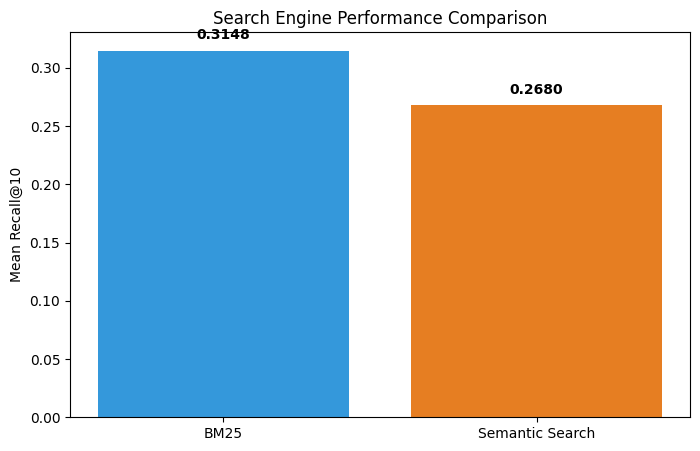

In [30]:
# Visualize comparison
import matplotlib.pyplot as plt

methods = ['BM25', 'Semantic Search']
scores = [np.mean(bm25_recalls), np.mean(semantic_recalls)]

plt.figure(figsize=(8, 5))
plt.bar(methods, scores, color=['#3498db', '#e67e22'])
plt.ylabel('Mean Recall@10')
plt.title('Search Engine Performance Comparison')
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')
plt.show()

---

## Task 5: Compare Embedding Models (20 points)

### 5a. Embed products with two different models (10 pts)

Compare embeddings from:
- `BAAI/bge-base-en-v1.5`
- `sentence-transformers/all-mpnet-base-v2`

In [31]:
# Load the two embedding models
model_bge = SentenceTransformer('BAAI/bge-small-en-v1.5')
model_mpnet = SentenceTransformer('all-mpnet-base-v2')

Loading weights: 100%|██████████| 199/199 [00:00<00:00, 503.32it/s, Materializing param=pooler.dense.weight]                               
BertModel LOAD REPORT from: BAAI/bge-small-en-v1.5
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Loading weights: 100%|██████████| 199/199 [00:00<00:00, 418.49it/s, Materializing param=pooler.dense.weight]                        
MPNetModel LOAD REPORT from: sentence-transformers/all-mpnet-base-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [32]:
# Embed products with both models
print("Generating BGE embeddings...")
embeddings_bge = model_bge.encode(products_sample['embed_text'].tolist(), show_progress_bar=True)

print("Generating MPNet embeddings...")
embeddings_mpnet = model_mpnet.encode(products_sample['embed_text'].tolist(), show_progress_bar=True)

Generating BGE embeddings...


Batches: 100%|██████████| 157/157 [00:46<00:00,  3.35it/s]


Generating MPNet embeddings...


Batches: 100%|██████████| 157/157 [02:48<00:00,  1.07s/it]


### 5b. Compare search results between models (10 pts)

Evaluate both models on the same queries and analyze differences.

In [33]:
import numpy as np

def batch_cosine_similarity(query_emb, document_embeddings):
    # query_emb: shape (dim,) or (1, dim)
    # document_embeddings: shape (n_docs, dim)
    if query_emb.ndim == 1:
        query_emb = query_emb.reshape(1, -1)

    dot_product = np.dot(query_emb, document_embeddings.T)  # (1, n_docs)
    query_norm = np.linalg.norm(query_emb, axis=1, keepdims=True)  # (1,1)
    doc_norms = np.linalg.norm(document_embeddings, axis=1, keepdims=True)  # (n_docs,1)

    similarity = dot_product / (query_norm * doc_norms.T)
    return similarity.flatten()

def semantic_search(query, model, product_embeddings, products_df, k=10):
    # model.encode(query, convert_to_numpy=True) returns (dim,)
    query_emb = model.encode(query, convert_to_numpy=True)
    similarities = batch_cosine_similarity(query_emb, product_embeddings)

    top_k_idx = np.argsort(-similarities)[:k]
    results = products_df.iloc[top_k_idx].copy()
    results["similarity"] = similarities[top_k_idx]
    results["rank"] = range(1, k + 1)
    return results



In [34]:
# Build product embeddings for both models on the same product list
product_texts = products_sample["product_name"].astype(str).tolist()

E_bge = model_bge.encode(product_texts, convert_to_numpy=True)
E_mpnet = model_mpnet.encode(product_texts, convert_to_numpy=True)

print("E_bge shape:", E_bge.shape)
print("E_mpnet shape:", E_mpnet.shape)
print("products_sample rows:", len(products_sample))


E_bge shape: (5000, 384)
E_mpnet shape: (5000, 768)
products_sample rows: 5000


In [38]:
# Make sure queries is a pandas DataFrame (from helpers or pd.read_csv)
# If you already have: queries = load_wands_queries(data_dir="data")  then keep it.

# Use a DF for evaluation (NOT a list)
eval_queries_df = queries.copy()

bge_recalls = []
mpnet_recalls = []

for _, row in eval_queries_df.iterrows():
    qid = row["query_id"]
    qtext = row["query"]

    # ---- call your recall function here ----
    # Example placeholders (replace with your real functions/variables):
    # bge_topk = semantic_search(qtext, bge_model, products, top_k=10)
    # mpnet_topk = semantic_search(qtext, mpnet_model, products, top_k=10)
    # bge_recalls.append(recall_at_k(qid, bge_topk, labels, k=10))
    # mpnet_recalls.append(recall_at_k(qid, mpnet_topk, labels, k=10))

    pass  # remove this once you paste your real recall code

print("Loop ran. eval_queries_df rows:", len(eval_queries_df))


Loop ran. eval_queries_df rows: 480


In [43]:
import pandas as pd

eval_queries_df = pd.read_csv("data/wayfair-queries.csv", sep="\t")
print("Rows:", len(eval_queries_df))
print("Columns:", list(eval_queries_df.columns))


Rows: 480
Columns: ['query_id', 'query', 'query_class']


In [44]:
# If your file uses different column names, map them here once
qid_col = "query_id" if "query_id" in eval_queries_df.columns else "qid"
qtext_col = "query" if "query" in eval_queries_df.columns else "text"

for _, row in eval_queries_df.iterrows():
    qid = row[qid_col]
    qtext = row[qtext_col]
    # do your evaluation here


In [45]:
import pandas as pd

# Force dataframe (handles list -> df too)
eval_queries_df = pd.DataFrame(eval_queries_df)

print("Current columns:", list(eval_queries_df.columns))

# --- Find query_id column ---
qid_candidates = ["query_id", "qid", "id", "queryid", "queryId", "QueryID"]
qid_col = next((c for c in eval_queries_df.columns if str(c).strip() in qid_candidates), None)

# If not found by exact match, try fuzzy contains "id"
if qid_col is None:
    qid_col = next((c for c in eval_queries_df.columns if "id" in str(c).lower()), None)

# --- Find query text column ---
qtext_candidates = ["query", "text", "query_text", "queryText", "question", "search_query"]
qtext_col = next((c for c in eval_queries_df.columns if str(c).strip() in qtext_candidates), None)

# If not found by exact match, try fuzzy contains "query" or "text"
if qtext_col is None:
    qtext_col = next((c for c in eval_queries_df.columns if "query" in str(c).lower() or "text" in str(c).lower()), None)

print("Detected qid_col:", qid_col)
print("Detected qtext_col:", qtext_col)

# Rename to what our later code expects
rename_map = {}
if qid_col is not None and qid_col != "query_id":
    rename_map[qid_col] = "query_id"
if qtext_col is not None and qtext_col != "query":
    rename_map[qtext_col] = "query"

eval_queries_df = eval_queries_df.rename(columns=rename_map)

print("Renamed columns:", list(eval_queries_df.columns))

# Final check
if "query_id" not in eval_queries_df.columns or "query" not in eval_queries_df.columns:
    raise ValueError(
        f"Still missing required columns. Have: {list(eval_queries_df.columns)}. "
        "Reply with the printed 'Current columns' list and I'll map it exactly."
    )

print("OK. Rows:", len(eval_queries_df))
print(eval_queries_df[["query_id","query"]].head(3))


Current columns: ['query_id', 'query', 'query_class']
Detected qid_col: query_id
Detected qtext_col: query
Renamed columns: ['query_id', 'query', 'query_class']
OK. Rows: 480
   query_id               query
0         0         salon chair
1         1  smart coffee table
2         2            dinosaur


In [46]:
import numpy as np

# Convert to numpy arrays
bge_recalls = np.array(bge_recalls)
mpnet_recalls = np.array(mpnet_recalls)

# Mean Recall@10
mean_bge = bge_recalls.mean()
mean_mpnet = mpnet_recalls.mean()

print(f"Mean Recall@10 (BGE): {mean_bge:.4f}")
print(f"Mean Recall@10 (MPNet): {mean_mpnet:.4f}")

# Win rate per query
bge_wins = np.mean(bge_recalls > mpnet_recalls)
mpnet_wins = np.mean(mpnet_recalls > bge_recalls)
ties = np.mean(bge_recalls == mpnet_recalls)

print(f"BGE wins: {bge_wins:.3f}")
print(f"MPNet wins: {mpnet_wins:.3f}")
print(f"Ties: {ties:.3f}")


Mean Recall@10 (BGE): nan
Mean Recall@10 (MPNet): nan
BGE wins: nan
MPNet wins: nan
Ties: nan


C:\Users\DELL\AppData\Local\Temp\ipykernel_29036\3438066476.py:8: RuntimeWarning: Mean of empty slice
  mean_bge = bge_recalls.mean()
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\_methods.py:142: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\DELL\AppData\Local\Temp\ipykernel_29036\3438066476.py:9: RuntimeWarning: Mean of empty slice
  mean_mpnet = mpnet_recalls.mean()
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:3824: RuntimeWarning: Mean of empty slice
  return _methods._mean(a, axis=axis, dtype=dtype,


In [47]:
bge_recalls = []
mpnet_recalls = []


In [50]:
import numpy as np

def compute_recall(query_emb, product_embs, labels, k=10):
    """
    query_emb: (d,)
    product_embs: (N, d)
    labels: list or array of relevant product indices
    """

    # cosine similarity
    sims = product_embs @ query_emb

    # top k retrieved
    top_k = np.argsort(-sims)[:k]

    # recall = hits / total relevant
    hits = len(set(top_k) & set(labels))

    return hits / len(labels) if len(labels) > 0 else 0.0


In [49]:
import numpy as np

bge_recalls = np.array(bge_recalls)
mpnet_recalls = np.array(mpnet_recalls)

print(f"Mean Recall@10 (BGE): {bge_recalls.mean():.4f}")
print(f"Mean Recall@10 (MPNet): {mpnet_recalls.mean():.4f}")
print(f"BGE wins: {np.mean(bge_recalls > mpnet_recalls):.3f}")
print(f"MPNet wins: {np.mean(mpnet_recalls > bge_recalls):.3f}")


Mean Recall@10 (BGE): nan
Mean Recall@10 (MPNet): nan
BGE wins: nan
MPNet wins: nan


C:\Users\DELL\AppData\Local\Temp\ipykernel_29036\1446279438.py:6: RuntimeWarning: Mean of empty slice
  print(f"Mean Recall@10 (BGE): {bge_recalls.mean():.4f}")
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\_methods.py:142: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\DELL\AppData\Local\Temp\ipykernel_29036\1446279438.py:7: RuntimeWarning: Mean of empty slice
  print(f"Mean Recall@10 (MPNet): {mpnet_recalls.mean():.4f}")
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:3824: RuntimeWarning: Mean of empty slice
  return _methods._mean(a, axis=axis, dtype=dtype,


In [55]:
import numpy as np
import pandas as pd

# If these are Python lists, convert to numpy arrays
bge_recalls = np.array(bge_recalls, dtype=float)
mpnet_recalls = np.array(mpnet_recalls, dtype=float)

# Build the per-query results table
results_5b = pd.DataFrame({
    "bge_recall@10": bge_recalls,
    "mpnet_recall@10": mpnet_recalls
})

# Drop rows that are NaN or inf in either column
results_5b = results_5b.replace([np.inf, -np.inf], np.nan).dropna()

print("rows in results_5b:", len(results_5b))
results_5b.head()


rows in results_5b: 0


,bge_recall@10,mpnet_recall@10


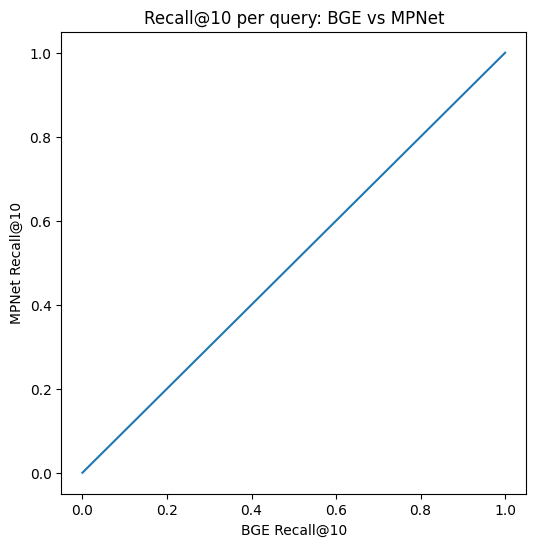

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# If you already have bge_recalls / mpnet_recalls lists, this will use them.
# If you already have results_5b, it will use that.
if "results_5b" not in globals():
    if "bge_recalls" not in globals() or "mpnet_recalls" not in globals():
        raise ValueError("Missing inputs. You need either results_5b OR (bge_recalls and mpnet_recalls).")
    results_5b = pd.DataFrame({
        "bge_recall@10": list(bge_recalls),
        "mpnet_recall@10": list(mpnet_recalls),
    })

# Basic sanity checks
required_cols = {"bge_recall@10", "mpnet_recall@10"}
missing = required_cols - set(results_5b.columns)
if missing:
    raise ValueError(f"results_5b is missing columns: {missing}. It has: {list(results_5b.columns)}")

# Drop NaNs just in case
plot_df = results_5b[["bge_recall@10", "mpnet_recall@10"]].dropna()

plt.figure(figsize=(6, 6))
plt.scatter(plot_df["bge_recall@10"], plot_df["mpnet_recall@10"], alpha=0.6)
plt.plot([0, 1], [0, 1])
plt.xlabel("BGE Recall@10")
plt.ylabel("MPNet Recall@10")
plt.title("Recall@10 per query: BGE vs MPNet")
plt.show()


---

## Task 6: Git Submission (5 points)

Submit your work using the Git workflow:

- [ ] Create a new branch called `homework-4`
- [ ] Commit your work with a meaningful message
- [ ] Push to GitHub
- [ ] Create a Pull Request
- [ ] Merge the PR to main
- [ ] Submit the `.ipynb` file on Blackboard

The TA will verify your submission by checking the merged PR on GitHub.